<a href="https://colab.research.google.com/github/Neethu-Suman/python_world/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definition of the problem
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

##Summary for problem definition:
To study the cause for the dip the revenues and identify the factors affecting the demand for Yulu shared electric cycles in the Indian market

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu.csv

--2023-03-29 18:21:21--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.67.66.49, 18.67.66.76, 18.67.66.31, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.67.66.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu.csv’

yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.02s   

2023-03-29 18:21:21 (36.7 MB/s) - ‘yulu.csv’ saved [648353/648353]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('yulu.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data.isnull().sum()
#no missing terms

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#Initial Observation
There are no missing values

The shape of dataset is (10886, 12)

•	Categorical attributes:
  -	datetime: DateTime
  -	season: season (1: spring, 2: summer, 3: fall, 4: winter)
  -	holiday: whether the day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
  - working day: if the day is neither weekend nor holiday is 1, otherwise is 0.
  -	weather:
    1.	Clear, Few clouds, partly cloudy, partly cloudy
    2.	Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3.	Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4.	Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

•	Numerical attributes:
  - temp: temperature in Celsius
  - atemp: feeling temperature in Celsius
  - humidity: humidity
  -	windspeed: wind speed
  - casual: count of casual users
  -	registered: count of registered users
  -	count: count of total rental bikes including both casual and registered


In [ ]:
columns = ['season', 'holiday', 'workingday', 'weather']
data[columns]=data[columns].astype('object')
data.describe(include='all')
#conversion of categorical attributes to 'category'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


# Datetime  

In [ ]:
data["datetime"].value_counts()

2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64

# Season

In [ ]:
data["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

# Almost equal division among all the season  
* 4    - 2734
* 2    - 2733
* 3    - 2733
* 1    - 2686

<Axes: xlabel='season', ylabel='count'>

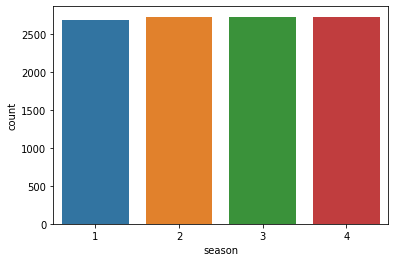

In [ ]:
sns.countplot(x=data["season"])
#Almost equal division among all the seasons

# Holiday     

In [ ]:
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
print(data["holiday"].value_counts()[0],"(",data["holiday"].value_counts()[0]/len(data)*100,")")
print(data["holiday"].value_counts()[1],"(",data["holiday"].value_counts()[1]/len(data)*100,")")

10575 ( 97.14311960316002 )
311 ( 2.856880396839978 )


<Axes: xlabel='holiday', ylabel='count'>

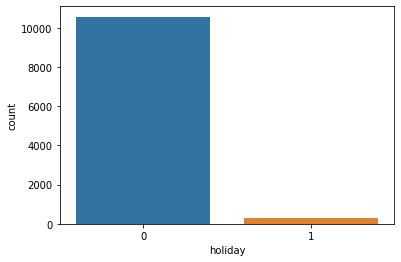

In [ ]:
sns.countplot(x=data['holiday'])
#97.14 % days are not a holidays
#2.86 % days are holidays

# Workingday   

In [ ]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
print(data["workingday"].value_counts()[0],"(",data["workingday"].value_counts()[0]/len(data)*100,")")
print(data["workingday"].value_counts()[1],"(",data["workingday"].value_counts()[1]/len(data)*100,")")

3474 ( 31.912548227080656 )
7412 ( 68.08745177291935 )


<Axes: xlabel='workingday', ylabel='count'>

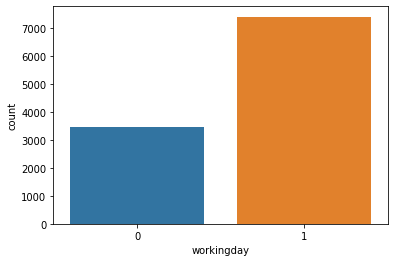

In [ ]:
sns.countplot(x=data['workingday'])
# 1 working ( 7412 days - 68.08 %)
#0 Weekend nor holiday (3474 days - 31.92 %)

# weather     

In [ ]:
data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
print(data["weather"].value_counts()[1],"(",round(data["weather"].value_counts()[1]/len(data)*100,2),")")
print(data["weather"].value_counts()[2],"(",round(data["weather"].value_counts()[2]/len(data)*100,2),")")
print(data["weather"].value_counts()[3],"(",round(data["weather"].value_counts()[3]/len(data)*100,2),")")
print(data["weather"].value_counts()[4],"(",round(data["weather"].value_counts()[4]/len(data)*100,2),")")

7192 ( 66.07 )
2834 ( 26.03 )
859 ( 7.89 )
1 ( 0.01 )


<Axes: xlabel='weather', ylabel='count'>

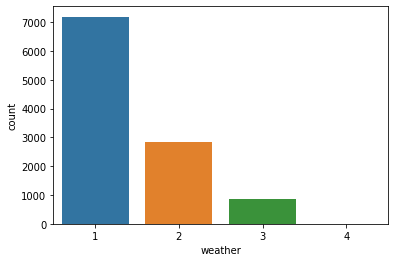

In [ ]:
sns.countplot(x=data['weather'])
#1 7192 ( 66.07 % )
#2 2834 ( 26.03 %)
#3 859 ( 7.89 %)
#4 1 ( 0.01 %)

# temp          

In [ ]:
data["temp"].value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [ ]:
data["temp"].astype('object').describe()

count     10886.00
unique       49.00
top          14.76
freq        467.00
Name: temp, dtype: float64

<Axes: xlabel='temp', ylabel='count'>

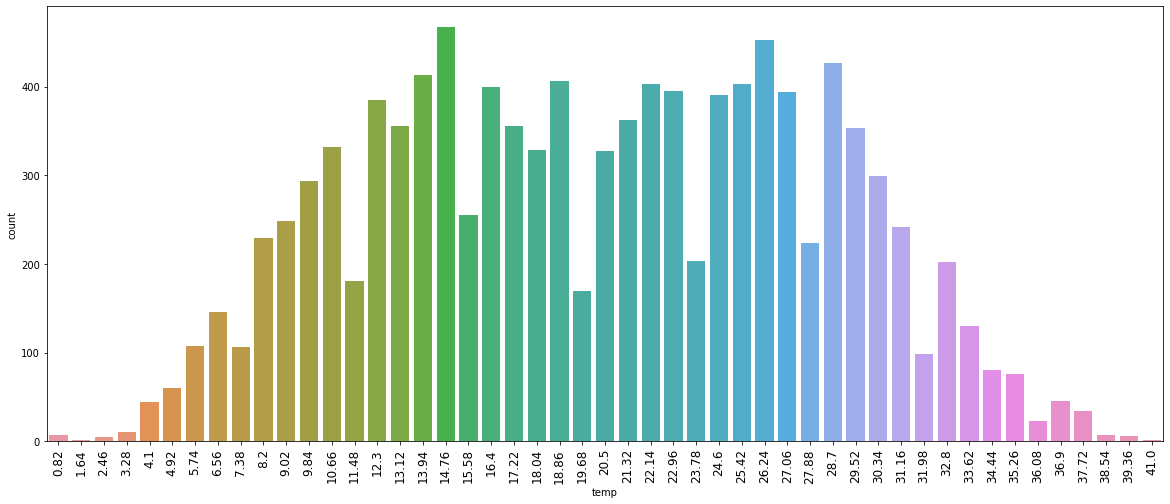

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
sns.countplot(x=data['temp'])
#temp: temperature in Celsius
#0.82 to 41 with mean = 20.23086
#49 uniquevalues with top = 14.76 which is repeated 467 times

<Axes: xlabel='temp', ylabel='Count'>

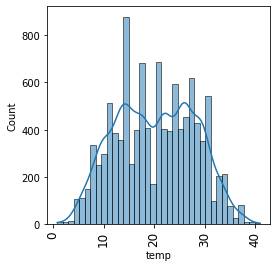

In [ ]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=90,fontsize=12)
sns.histplot(x=data['temp'],kde = True)
#follow almost normal distribution

<Axes: xlabel='temp'>

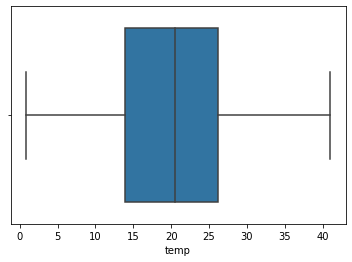

In [ ]:
sns.boxplot(x=data['temp'])
# no outlier

# atemp        

In [ ]:
data["atemp"].value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

In [ ]:
data["atemp"].astype('object').describe()

count     10886.00
unique       60.00
top          31.06
freq        671.00
Name: atemp, dtype: float64

<Axes: xlabel='atemp', ylabel='count'>

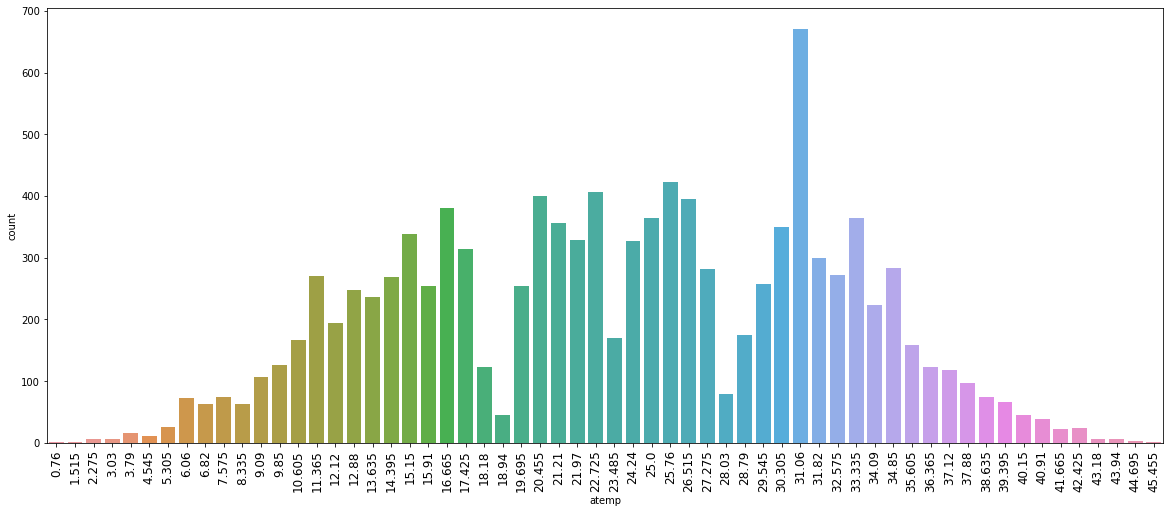

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
sns.countplot(x=data['atemp'])
#atemp: feeling temperature in Celsius
#0.760000 to 45.455000 with mean - 23.655084
#60 unique values with top = 31.06 which is repeated 671 times

<Axes: xlabel='atemp', ylabel='Count'>

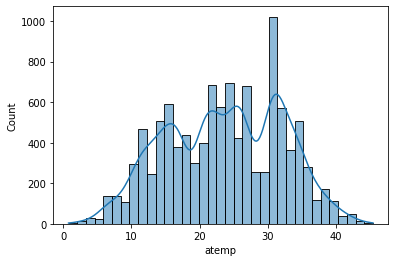

In [ ]:
sns.histplot(x=data['atemp'],kde = True)
#follow almost normal distribution

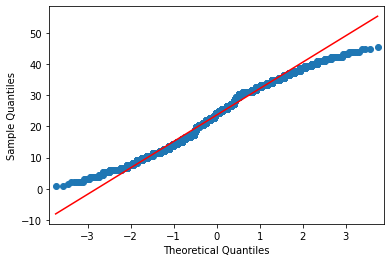

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['atemp'], line = "s")
plt.show()

In [ ]:
from scipy.stats import shapiro, kstest

from scipy.stats import levene

In [ ]:
atemp_subset = data['atemp'].sample(100)

In [ ]:
# H0 : data['atemp'] is Gaussian
# HA : data['atemp'] is not Gaussian
test_stat, p_value = shapiro(atemp_subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("data['atemp'] is not Gaussian")
else:
    print("Fail to reject H0")
    print("data['atemp'] is Gaussian")

0.16035334765911102
Fail to reject H0
data['atemp'] is Gaussian


<Axes: xlabel='atemp'>

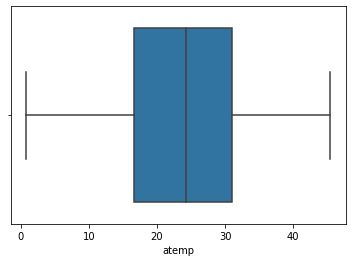

In [ ]:
sns.boxplot(x=data['atemp'])
# no outlier

# humidity      

In [ ]:
data["humidity"].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [ ]:
data["humidity"].astype('object').describe()

count     10886
unique       89
top          88
freq        368
Name: humidity, dtype: int64

<Axes: xlabel='humidity', ylabel='count'>

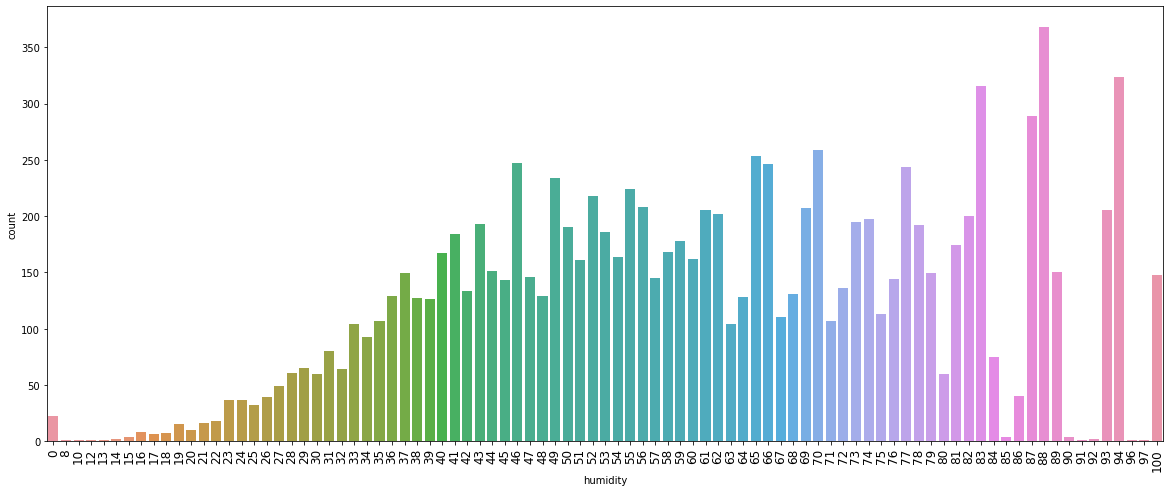

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
sns.countplot(x=data['humidity'])
#humidity
#0 to 100 with mean = 61.886460
#89 unique values with top = 88 which is repeated 368 times

<Axes: xlabel='humidity'>

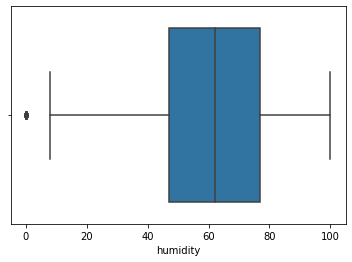

In [ ]:
sns.boxplot(x=data['humidity'])
#Outliers at 0 values

# windspeed     

In [ ]:
data["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [ ]:
data["windspeed"].astype('object').describe()

count     10886.0
unique       28.0
top           0.0
freq       1313.0
Name: windspeed, dtype: float64

<Axes: xlabel='windspeed', ylabel='count'>

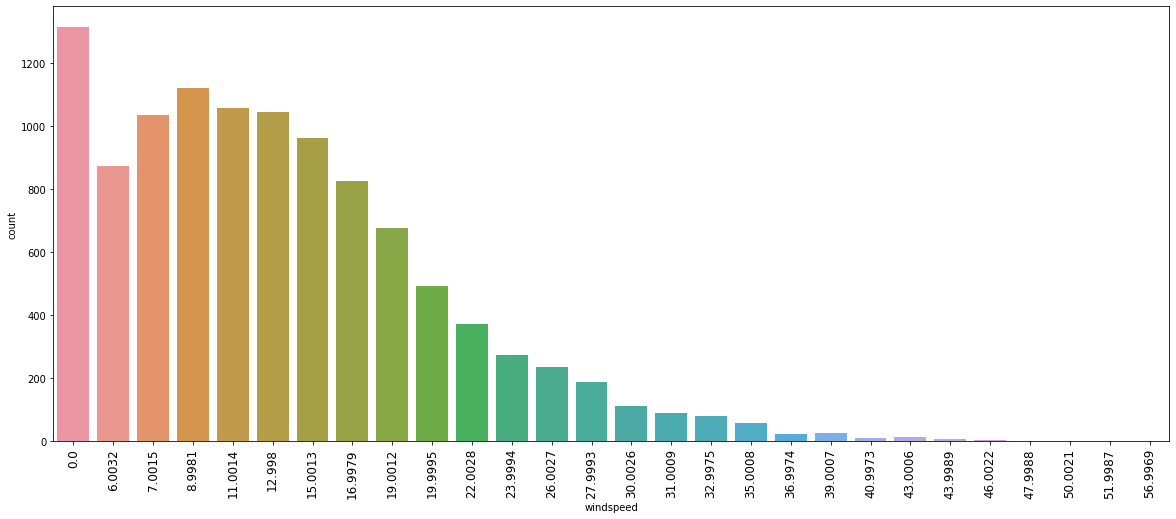

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
sns.countplot(x=data['windspeed'])
#wind speed
#0 to 56.9969 with mean = 12.799395
#28 unique values with top = 0 which is repeated 1313 times

<Axes: xlabel='windspeed'>

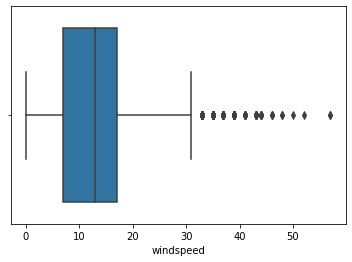

In [ ]:
sns.boxplot(x=data['windspeed'])
# Few Outlier after 30

# casual       

In [ ]:
data["casual"].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [ ]:
data["casual"].astype('object').describe()

count     10886
unique      309
top           0
freq        986
Name: casual, dtype: int64

<Axes: xlabel='casual'>

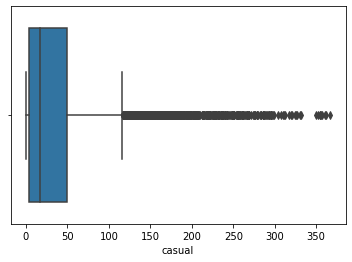

In [ ]:
sns.boxplot(x=data['casual'])
#Outlier after 110

<Axes: xlabel='casual', ylabel='Count'>

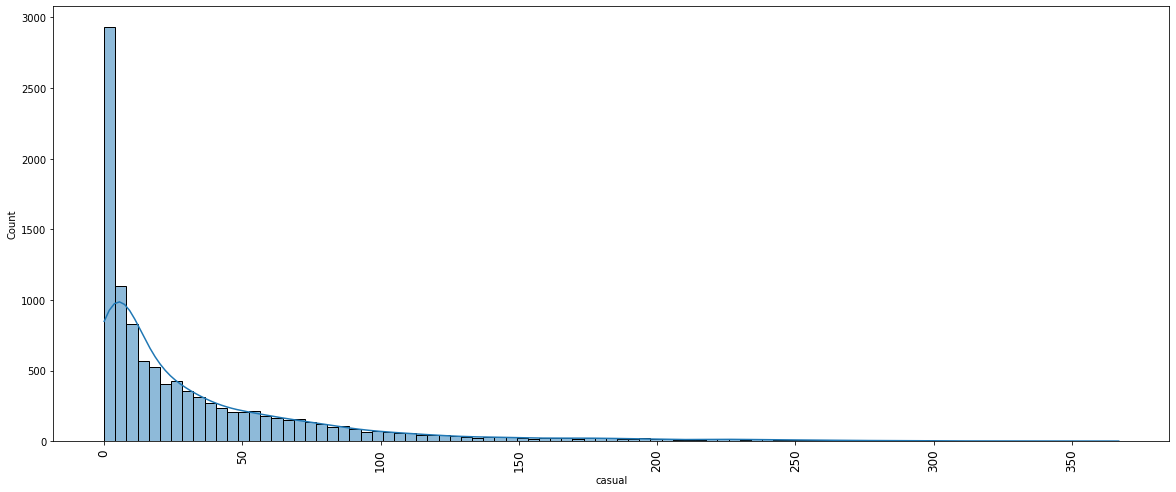

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
sns.histplot(x=data["casual"], kde = True)
#casual: count of casual users
#0 to 367 with mean = 36.021955
#309 unique values with top = 0 which is repeated 986 times

# registered    

In [ ]:
data["registered"].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [ ]:
data["registered"].astype('object').describe()

count     10886
unique      731
top           3
freq        195
Name: registered, dtype: int64

<Axes: xlabel='registered'>

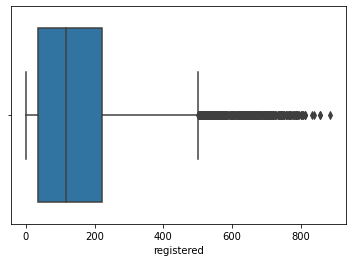

In [ ]:
sns.boxplot(x=data["registered"])
#Outlier after 500

<Axes: xlabel='registered', ylabel='Count'>

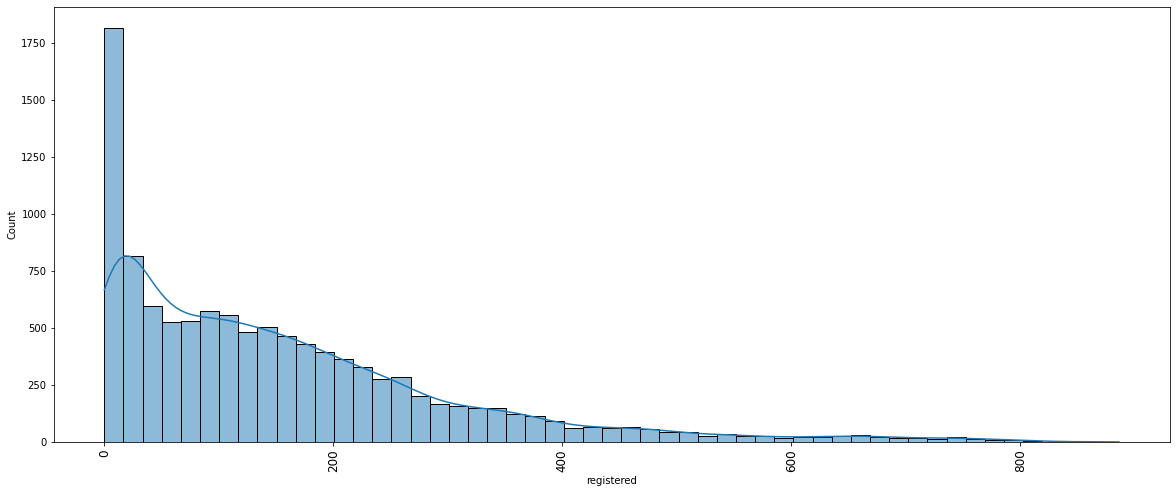

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
sns.histplot(x=data["registered"],kde =True)
#registered: count of registered users
#0 to 886 with mean = 155.552177
#731 unique values with top = 3 which is repeated 195 times

# count        

In [ ]:
data["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [ ]:
data["count"].astype('object').describe()

count     10886
unique      822
top           5
freq        169
Name: count, dtype: int64

<Axes: xlabel='count'>

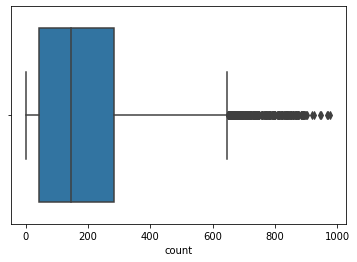

In [ ]:
sns.boxplot(x=data["count"])
#Outlier after 620

<Axes: xlabel='count', ylabel='Count'>

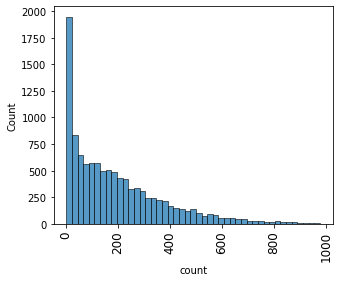

In [ ]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=90,fontsize=12)
sns.histplot(x=data['count'])
#count: count of total rental bikes including both casual and registered
#1 to 977 with mean = 191.574132
#822 unique values with top = 5 which is repeated 169 times

# Statistical summary
No missing values
## Categorical attributes:
1. datetime: datetime (10886 unique values)
2. season: season    
  * 1 spring (2686 days)
  * 2 summer (2733 days)
  * 3 fall (2733 days)
  * 4 winter (2734 days)
  
  * Almost equal division among all the seasons
3. holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)     
  * 0 - not a holiday (10575 days - 97.14 %)
  * 1 - holiday (311 - 2.86 %)
4. Working day:   
  * 1 working ( 7412 days - 68.08 %)
  * 0 Weekend nor holiday (3474 days - 31.92 %)
5. Weather
  1. Clear, Few clouds, partly cloudy, partly cloudy ( 7192 - 66.07 % )
  2.	Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ( 2834 - 26.03 % )
  3.	Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (859 - 7.89 % )
  4.	Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ( 1  - 0.01 % )

## Numerical attributes:
1. temp: temperature in Celsius
  * 0.82	to 41 with mean = 20.23086
  * 49 uniquevalues with top = 14.76 which is repeated 467 times
2. atemp: feeling temperature in Celsius
  * 0.760000 to 45.455000 with mean - 23.655084
  * 60 unique values with top = 31.06 which is repeated 671 times
3. humidity: humidity
  * 0 to 100 with mean = 61.886460
  * 89 unique values with top = 88 which is repeated 368 times
4. windspeed: wind speed
  * 0 to 56.9969 with mean = 12.799395
  * 28 unique values with top = 0 which is repeated 1313 times
5. casual: count of casual users
  * 0 to 367 with mean = 36.021955
  * 309 unique values with top = 0 which is repeated 986 times
6. registered: count of registered users
  * 0 to 886 with mean = 155.552177
  * 731 unique values with top = 3 which is repeated 195 times
7. count: count of total rental bikes including both casual and registered
  * 1 to 977 with mean = 191.574132
  * 822 unique values with top = 5 which is repeated 169 times

<Axes: xlabel='workingday', ylabel='count'>

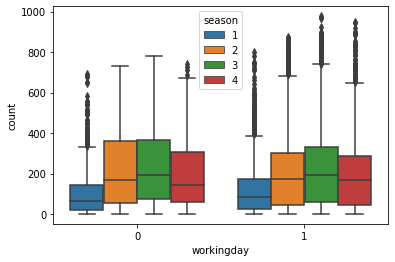

In [ ]:
sns.boxplot(data=data, x='workingday',y='count', hue = "season")

<Axes: xlabel='workingday', ylabel='count'>

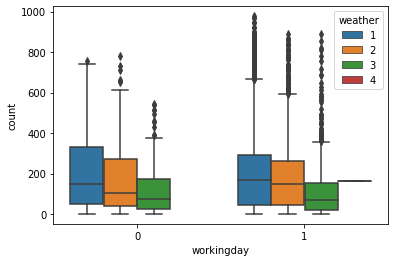

In [ ]:
sns.boxplot(data=data, x='workingday',y='count', hue = "weather")

<Axes: xlabel='workingday', ylabel='count'>

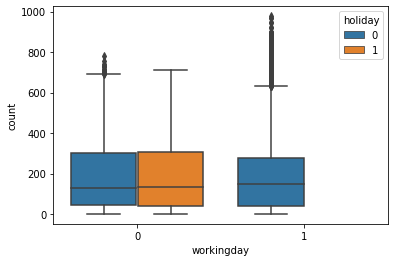

In [ ]:
sns.boxplot(data=data, x='workingday',y='count', hue = "holiday")

<Axes: xlabel='holiday', ylabel='count'>

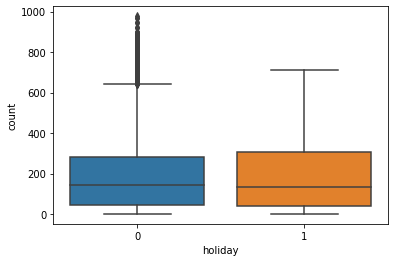

In [ ]:
sns.boxplot(data=data, x='holiday',y='count')
# Almost same mean. But we have a lot of outlier in case of '0'

<Axes: xlabel='holiday', ylabel='count'>

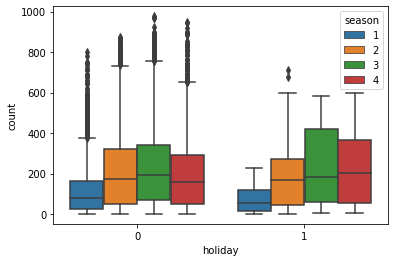

In [ ]:
sns.boxplot(data=data, x='holiday',y='count',hue = "season")

# Hypothesis Testing

## 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [ ]:
workingday_0 = data[data["workingday"]==0]['count']
workingday_1 = data[data["workingday"]==1]['count']

In [ ]:
# Ho : Mean of number of electric cycles rented for working day = Mean of number of electric cycles rented for non working day
# HA : Mean of number of electric cycles rented for working day != Mean of number of electric cycles rented for non working day
from scipy.stats import ttest_ind
ttest_ind(workingday_0,workingday_1)
# As p-value > alpha/2 = 0.025, Fail to reject Ho
#Mean of number of electric cycles rented for working day ~ Mean of number of electric cycles rented for non working day

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

In [ ]:
print("Mean of number of electric cycles rented for working day = ",workingday_0.mean())
print("Mean of number of electric cycles rented for non working day = ",workingday_1.mean())
print("Both are almost equal")

Mean of number of electric cycles rented for working day =  188.50662061024755
Mean of number of electric cycles rented for non working day =  193.01187263896384
Both are almost equal


<Axes: xlabel='workingday', ylabel='count'>

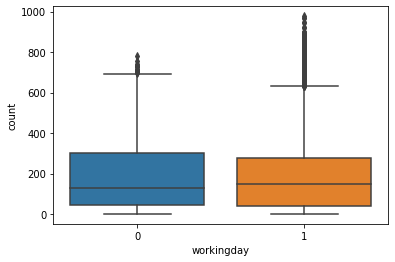

In [ ]:
sns.boxplot(data=data, x='workingday',y='count')

## ANNOVA to check if No. of cycles rented is similar or different in different  weather condition

In [ ]:
weather_1 = data[data["weather"]==1]['count']
weather_2 = data[data["weather"]==2]['count']
weather_3 = data[data["weather"]==3]['count']
weather_4 = data[data["weather"]==4]['count']

In [ ]:
#Ho : All four weather condition have same mean for number of electric cycles rented
#Ha: At least one is different than the other
from scipy.stats import f_oneway
f_oneway(weather_1,weather_2,weather_3,weather_4)
#As p-value << 0, we can reject Ho.

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

<Axes: xlabel='weather', ylabel='count'>

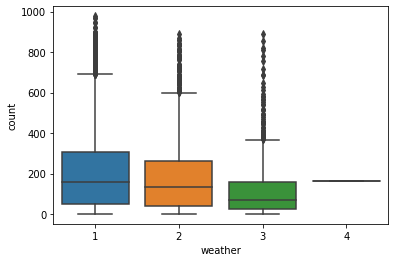

In [ ]:
sns.boxplot(data=data, x='weather',y='count')

In [ ]:
print("The mean of number of electric cycles rented for weather condition 1 is", weather_1.mean())
print("The mean of number of electric cycles rented for weather condition 2 is", weather_2.mean())
print("The mean of number of electric cycles rented for weather condition 3 is", weather_3.mean())
print("The mean of number of electric cycles rented for weather condition 4 is", weather_4.mean())
# Mean of number of electric cycles rented for all weather condition difference in value

The mean of number of electric cycles rented for weather condition 1 is 205.23679087875416
The mean of number of electric cycles rented for weather condition 2 is 178.95553987297106
The mean of number of electric cycles rented for weather condition 3 is 118.84633294528521
The mean of number of electric cycles rented for weather condition 4 is 164.0


In [ ]:
f_oneway(weather_2,weather_4)
# As p-value > 0.05, we fail to reject Ho

F_onewayResult(statistic=0.00788751238773749, pvalue=0.9292378620021875)

#ANNOVA to check if No. of cycles rented is similar or different in different season

In [ ]:
season_1 = data[data["season"]==1]['count']
season_2 = data[data["season"]==2]['count']
season_3 = data[data["season"]==3]['count']
season_4 = data[data["season"]==4]['count']

In [ ]:
#Ho : All four season have same mean for number of electric cycles rented
#Ha: At least one is different than the other
f_oneway(season_1,season_2,season_3,season_4)
#As p-value << 0, We reject Ho

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

<Axes: xlabel='season', ylabel='count'>

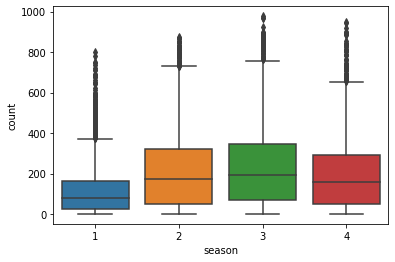

In [ ]:
sns.boxplot(data=data, x='season',y='count')

In [ ]:
print("The mean of number of electric cycles rented for season condition 1 is", season_1.mean())
print("The mean of number of electric cycles rented for season condition 2 is", season_2.mean())
print("The mean of number of electric cycles rented for season condition 3 is", season_3.mean())
print("The mean of number of electric cycles rented for season condition 4 is", season_4.mean())
## Mean of number of electric cycles rented for all season condition difference in value

The mean of number of electric cycles rented for season condition 1 is 116.34326135517499
The mean of number of electric cycles rented for season condition 2 is 215.25137211855105
The mean of number of electric cycles rented for season condition 3 is 234.417124039517
The mean of number of electric cycles rented for season condition 4 is 198.98829553767374


## Chi-square test to check if Weather is dependent on the season

<Axes: xlabel='season', ylabel='count'>

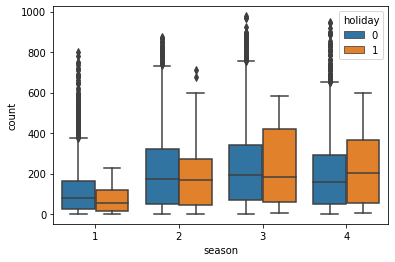

In [ ]:
sns.boxplot(data=data, x='season',y='count',hue = "holiday")

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
observed = pd.crosstab(index=data["weather"],columns=data["season"],margins=True)
observed

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [ ]:
#Ho : Weather is independent of the season
#Ha : Weather is dependent on the season
chi2_contingency(observed)
#As p-value << 0, we can reject Ho
#Weather is dependent on the season

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=3.1185273325126814e-05, dof=16, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03,
        7.19200000e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02,
        2.83400000e+03],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02,
        8.59000000e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01,
        1.00000000e+00],
       [2.68600000e+03, 2.73300000e+03, 2.73300000e+03, 2.73400000e+03,
        1.08860000e+04]]))

<Axes: >

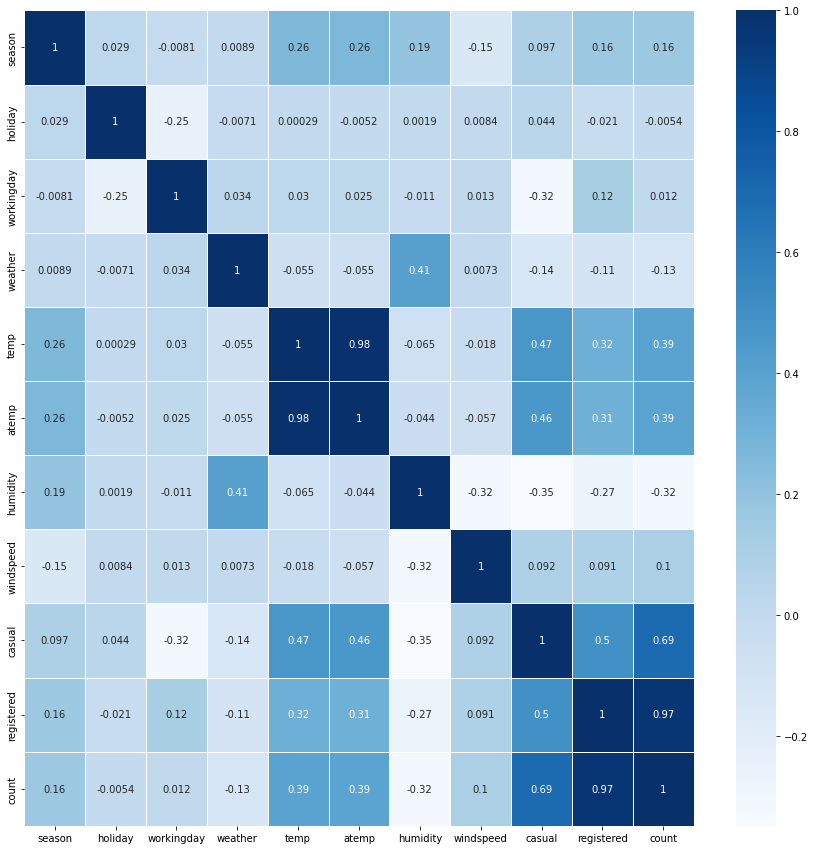

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="Blues", linewidth=.5)

* There is postive corelation between temp and atemp.
* There is negative corelation between tempearture, atemperature and humidity , windspeed
* The total count of users ( also casual as registered users) depends on the temperature
* There no coorelation between humidity and wind speed, total count of users ( also casual as registered users)

<Axes: xlabel='casual', ylabel='registered'>

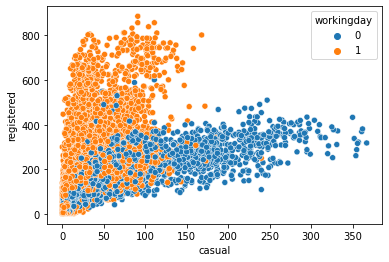

In [ ]:
sns.scatterplot(data=data, x="casual", y="registered", hue="workingday")

<Axes: xlabel='casual', ylabel='registered'>

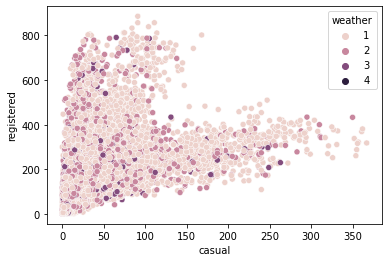

In [ ]:
sns.scatterplot(data=data, x="casual", y="registered", hue="weather")

#Insights

#Statistical summary
No missing values
##Categorical attributes:
1.	datetime: DateTime (10886 unique values)
2.	season: season
-1 spring (2686 days)
- 2 summer (2733 days)
-	3 fall (2733 days)
-	4 winter (2734 days)
-	Almost equal division among all the seasons
3.	holiday: whether the day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- 0 - not a holiday (10575 days - 97.14 %)
-	1 - holiday (311 - 2.86 %)
4.	Working day:
-	1 working ( 7412 days - 68.08 %)
-	0 Weekend nor holiday (3474 days - 31.92 %)
5.	Weather
-	Clear, Few clouds, partly cloudy, partly cloudy ( 7192 - 66.07 % )
-	Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ( 2834 - 26.03 % )
-	Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (859 - 7.89 % )
-	Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ( 1 - 0.01 % )
Numerical attributes:
6.	temp: temperature in Celsius
-	0.82 to 41 with mean = 20.23086
-	49 unique values with top = 14.76 which is repeated 467 times
7.	atemp: feeling temperature in Celsius
-	0.760000 to 45.455000 with mean - 23.655084
-	60 unique values with top = 31.06 which is repeated 671 times
8.	humidity: humidity
-	0 to 100 with mean = 61.886460
-	89 unique values with top = 88 which is repeated 368 times
9.	windspeed: wind speed
-	0 to 56.9969 with mean = 12.799395
-	28 unique values with top = 0 which is repeated 1313 times
10.	casual: count of casual users
-	0 to 367 with mean = 36.021955
-	309 unique values with top = 0 which is repeated 986 times
8.	registered: count of registered users
-	0 to 886 with mean = 155.552177
-	731 unique values with top = 3 which is repeated 195 times
9.	count: count of total rental bikes including both casual and registered
-	1 to 977 with mean = 191.574132
-	822 unique values with top = 5 which is repeated 169 times
10.	From 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented, we can infer that the mean of the number of electric cycles rented for working day = Mean of number of electric cycles rented for the non-working day
11.	By performing ANOVA on the number of cycles rented in different weather conditions, we infer that the mean of the number of electric cycles rented for all weather conditions varies.
12.	By performing ANOVA on the number of cycles rented in different seasons, we infer that the mean of the number of electric cycles rented for all season condition difference in the values
13.	Chi-square test concluded that weather conditions are dependent on the season
14.	From the correlation analysis of various numerical data, we can conclude that
-	There is a positive correlation between temperature and “atemp”.
-	There is a negative correlation between temperature, atemperature and humidity, windspeed
-	The total count of users (also casual as well as registered users) depends on the temperature
-	There is no correlation between humidity and wind speed, the total count of users (also casual as well as registered users)
-	The temperature and feeling temperature are influencing the numbers of users
15.	During the working day, registered users are more and while holidays or non-working day, casual users are more



#Recommendations:
1.	During the non-working day, they can give more offers to increase users
2.	Weather conditions influence the users. The reduction in the users is due the bad weather condition. During the heavy rain, there is almost zero percentages.
3.	The temperature and feeling temperature are influencing the numbers of users






